<a href="https://colab.research.google.com/github/syerazzz/Step-by-Step-ETL-process-Using-Python/blob/main/GroupProject_Group9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Group project - Group 9 </h1>

NUR SYAHIRA IRMA BINTI JASRUL NAZURIN (A186471)
<br>
EZREENA ARISYA BINTI JOHAR (A188377)
<br>
NUR HALEEDA BINTI KHAIRUDDIN (A188081)
<br>
SATHVEENA SRI A/P KOLANDAVELU (A189180)



# (1) EXTRACT : (10 pt)

a. Pick/choose your dataset - make sure it is legal to be scrape.  -1 points

b. scrape your data - identify your data attributes.  (at least 2 attribute per member) -   8 points

c. AT LEAST 100  or  more record of data are collected.  - 1 points

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
hotels_data = []
value = range(4)
#iterate from i =0 to = 3

for i in range(0,4):
  i = i+25
  url = 'https://www.booking.com/searchresults.html?label=gen173nr-1FCAEoggI46AdIM1gEaKEBiAEBmAExuAEXyAEM2AEB6AEB-AECiAIBqAIDuALJr8msBsACAdICJGMxMmZjYWU3LTI0MzYtNDIyOC05MDhiLTg1NTk1ZTk0YjFiMNgCBeACAQ&sid=6a7c4560a49b17b8a278b4afa259dfb4&aid=304142&checkin=2024-03-03&checkout=2024-03-04&dest_id=-2403010&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&selected_currency=MYR&offset={i}'
  headers = {'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
    }

  response  = requests.get(url, headers=headers)


  # Check if the request was successful (status code 200)
  if response.status_code == 200:
    # Parse the HTML content
    data = response.text
    soup = BeautifulSoup(data, 'html.parser')

    # Extract the title of the web page
    title = soup.title.text

    # Print the title
    print("Web Page Title:", title)
  else:
    print("Error:", response.status_code)

  # Find all the hotel elements in the HTML document
  hotels = soup.findAll('div', {'data-testid': 'property-card'})

  # Loop over the hotel elements and extract the desired data
  for hotel in hotels:

    #Extract the hotel name
    name_element = hotel.find('div', {'data-testid': 'title'})
    name = name_element.text.strip()

    # Extract the hotel location
    location_element = hotel.find('span',class_='aee5343fdb def9bc142a')
    if location_element:
      location_element = location_element.get_text(strip=True)
      location=location_element
      print(location)
    else:
      location="?"
      print("Location Not Found")

    # Extract the hotel price
    price_element = hotel.find('span',class_='f6431b446c fbfd7c1165 e84eb96b1f')
    if price_element:
      price_element= price_element.get_text(strip=True)
      price=price_element
      print(price)
    else:
      price="?"
      print("Price Not Found")

    # Extract the hotel recommended room
    room_element = hotel.find('h4', {'role': 'link'})
    if room_element:
      room_element = room_element.get_text(strip=True)
      room=room_element
      print(room)
    else:
      room = "?"
      print("Recommended Room Not Found")

    # Extract the hotel no. of reviews
    reviews_element = hotel.find('div', {'class': 'abf093bdfe f45d8e4c32 d935416c47'})
    if reviews_element:
      reviews_element = reviews_element.get_text(strip=True)
      reviews=reviews_element
      print(reviews)
    else:
      reviews = "?"
      print("No. of Reviews Not Found")

    # Details
    hotel_details = hotel.find('li',class_='a6a38de85e')
    if hotel_details:
      hotelDetails = hotel_details.get_text(strip=True)
      details=hotelDetails
      print(details)
    else:
      details = "?"
      print("Room Details Not Found")

    # Travel Sustainable Level
    hotel_level = hotel.find('span',class_='abf093bdfe d068504c75 f68ecd98ea')
    if hotel_level:
      hotelLevel = hotel_level.get_text(strip=True)
      level=hotelLevel
      print(level)
    else:
      level= "?"
      print("T.S.L. Not Found")

    # Hotel Rating
    hotel_rating = hotel.find('div',class_='a3b8729ab1 e6208ee469 cb2cbb3ccb')
    if hotel_rating:
      hotelRating = hotel_rating.get_text(strip=True)
      rating=hotelRating
      print(rating)
    else:
      rating = "?"
      print("Rating not found")


    # Hotel Score
    hotel_score = hotel.find('div',class_='a3b8729ab1 d86cee9b25')
    if hotel_score:
      hotelScore = hotel_score.get_text(strip=True)
      score=hotelScore
      print(score)
    else:
      score = "?"
      print("Score not found")

    # Append hotels_data with info about hotel
    hotels_data.append({
      'name': name,
      'Location': location,
      'Price': price,
      'Recommended Room': room,
      'No. of reviews': reviews,
      'Rating':rating,
      'Score':score,
      'Details':details,
      'Travel Sustainable Level': level
    })



Web Page Title: Booking.com:
Hotels in Kuala Lumpur.
Book your hotel now!

Bukit Bintang, Kuala Lumpur
MYR 262
One-Bedroom Apartment
82 reviews
Entire apartment•1 bedroom•1 bathroom•1 kitchen•48m²1 king bed
Travel Sustainable Level 3
Very Good
8.3
Downtown Kuala Lumpur, Kuala Lumpur
MYR 280
One-Bedroom Apartment
233 reviews
Entire apartment•1 bedroom•1 living room•1 bathroom•1 kitchen•59m²1 full bed
Travel Sustainable Level 3
Wonderful
9.2
Kuala Lumpur
MYR 217
Twin Room with Shared Bathroom
No. of Reviews Not Found
2 beds (1 bunk bed, 1 sofa bed)
T.S.L. Not Found
Rating not found
Score not found
Bukit Bintang, Kuala Lumpur
MYR 218
Deluxe Studio
135 reviews
Entire studio•1 bathroom•1 kitchen•26m²1 full bed
Travel Sustainable Level 3
Wonderful
9.3
Downtown Kuala Lumpur, Kuala Lumpur
MYR 263
One-Bedroom Apartment
6 reviews
Entire apartment•1 bedroom•1 bathroom•1 kitchen•799m²1 king bed
Travel Sustainable Level 3
Exceptional
9.7
Downtown Kuala Lumpur, Kuala Lumpur
MYR 333
Deluxe Queen Suit

In [ ]:
# Convert to DataFrame
hotels_df = pd.DataFrame(hotels_data)
hotels_df


,name,Location,Price,Recommended Room,No. of reviews,Rating,Score,Details,Travel Sustainable Level
0,KL BERJAYA TIMES SQUARE SERVICE RESIDENCEs,"Bukit Bintang, Kuala Lumpur",MYR 262,One-Bedroom Apartment,82 reviews,Very Good,8.3,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
1,"Crystal Suites at Eaton, KLCC","Downtown Kuala Lumpur, Kuala Lumpur",MYR 280,One-Bedroom Apartment,233 reviews,Wonderful,9.2,Entire apartment•1 bedroom•1 living room•1 bat...,Travel Sustainable Level 3
2,Resort Swimming Pool in the Sharing Apartment,Kuala Lumpur,MYR 217,Twin Room with Shared Bathroom,?,?,?,"2 beds (1 bunk bed, 1 sofa bed)",?
3,Ceylonz Suites KLCC By Twin Tower View,"Bukit Bintang, Kuala Lumpur",MYR 218,Deluxe Studio,135 reviews,Wonderful,9.3,Entire studio•1 bathroom•1 kitchen•26m²1 full bed,Travel Sustainable Level 3
4,The platinum KLCC By Garden Suites,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 263,One-Bedroom Apartment,6 reviews,Exceptional,9.7,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
...,...,...,...,...,...,...,...,...,...
95,SS Grey Hotel,"Bukit Bintang, Kuala Lumpur",MYR 127,Standard Double Room,295 reviews,Very Good,8.5,1 full bed,Travel Sustainable Level 1
96,KLCC Platinum 2 by Hibernate,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 251,One-Bedroom Apartment,56 reviews,Wonderful,9.0,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 2
97,Reizz Residence By Nirvana,"Ampang, Kuala Lumpur",MYR 145,One-Bedroom Apartment,148 reviews,Wonderful,9.4,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 2
98,Lila Suites Quill Residences Klcc,Kuala Lumpur,MYR 180,Executive Suite,165 reviews,Exceptional,9.6,Private suite•1 bedroom•1 living room•1 bathro...,?


In [ ]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'Booking.com.csv'

# Save the DataFrame to a CSV file
hotels_df.to_csv(csv_file_path, index=False)

print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to Booking.com.csv


# (2) TRANSFORM: (10 pt)


a. Perform any necessary data processing - ( at least 4 types of data processing and one of the processing is on the review/feedback data). - 8 points
<br>
b. Perform at least 2 or more data visualisation ( e.g before and after data cleaning)  - 2 points

## Data Processing
## a. Replace missing data ##

In [ ]:
import numpy as np

# replace "?" to NaN
hotels_df.replace("?", np.nan, inplace = True)
hotels_df.head(20)

,name,Location,Price,Recommended Room,No. of reviews,Rating,Score,Details,Travel Sustainable Level
0,KL BERJAYA TIMES SQUARE SERVICE RESIDENCEs,"Bukit Bintang, Kuala Lumpur",MYR 262,One-Bedroom Apartment,82 reviews,Very Good,8.3,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
1,"Crystal Suites at Eaton, KLCC","Downtown Kuala Lumpur, Kuala Lumpur",MYR 280,One-Bedroom Apartment,233 reviews,Wonderful,9.2,Entire apartment•1 bedroom•1 living room•1 bat...,Travel Sustainable Level 3
2,Resort Swimming Pool in the Sharing Apartment,Kuala Lumpur,MYR 217,Twin Room with Shared Bathroom,NaN,NaN,NaN,"2 beds (1 bunk bed, 1 sofa bed)",NaN
3,Ceylonz Suites KLCC By Twin Tower View,"Bukit Bintang, Kuala Lumpur",MYR 218,Deluxe Studio,135 reviews,Wonderful,9.3,Entire studio•1 bathroom•1 kitchen•26m²1 full bed,Travel Sustainable Level 3
4,The platinum KLCC By Garden Suites,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 263,One-Bedroom Apartment,6 reviews,Exceptional,9.7,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
5,Premier Suites at STAR,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 333,Deluxe Queen Suite,168 reviews,Wonderful,9.1,Private suite1 full bed,Travel Sustainable Level 3
6,Comfort Suites KLCC By Vortex,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 189,Two-Bedroom Suite,46 reviews,Very Good,8.0,Private suite•2 bedrooms•2 bathrooms•74m²2 que...,Travel Sustainable Level 3
7,"Pavilion Ceylon Hill Suites, Bukit Bintang","Bukit Bintang, Kuala Lumpur",MYR 210,Executive Studio,397 reviews,Very Good,8.5,1 queen bed,Travel Sustainable Level 3
8,Scarletz Suites KLCC by Mykey Global,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 236,Deluxe Studio,"2,367 reviews",Very Good,8.2,Entire studio•1 bathroom•1 kitchen•26m²1 queen...,Travel Sustainable Level 3
9,Eaton Suites KLCC,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 305,Family Junior Suite,829 reviews,Excellent,8.6,"2 beds (1 twin, 1 queen)",Travel Sustainable Level 3


### Replace missing data - 'No. of reviews'

In [ ]:
hotels_df['No. of reviews'].value_counts()

46 reviews       10
82 reviews        4
829 reviews       4
233 reviews       4
76 reviews        4
32 reviews        4
3,445 reviews     4
56 reviews        4
2,367 reviews     4
397 reviews       4
168 reviews       4
128 reviews       3
12 reviews        3
270 reviews       3
6 reviews         3
135 reviews       3
83 reviews        3
548 reviews       3
719 reviews       3
653 reviews       3
263 reviews       3
556 reviews       2
57 reviews        2
112 reviews       2
871 reviews       1
5,689 reviews     1
181 reviews       1
4,026 reviews     1
261 reviews       1
14 reviews        1
1,065 reviews     1
3 reviews         1
295 reviews       1
148 reviews       1
165 reviews       1
Name: No. of reviews, dtype: int64

In [ ]:
max = hotels_df['No. of reviews'].value_counts().idxmax()
max


'46 reviews'

In [ ]:
hotels_df["No. of reviews"].replace(np.nan, max, inplace = True)
hotels_df.head(20)

,name,Location,Price,Recommended Room,No. of reviews,Rating,Score,Details,Travel Sustainable Level
0,KL BERJAYA TIMES SQUARE SERVICE RESIDENCEs,"Bukit Bintang, Kuala Lumpur",MYR 262,One-Bedroom Apartment,82 reviews,Very Good,8.3,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
1,"Crystal Suites at Eaton, KLCC","Downtown Kuala Lumpur, Kuala Lumpur",MYR 280,One-Bedroom Apartment,233 reviews,Wonderful,9.2,Entire apartment•1 bedroom•1 living room•1 bat...,Travel Sustainable Level 3
2,Resort Swimming Pool in the Sharing Apartment,Kuala Lumpur,MYR 217,Twin Room with Shared Bathroom,46 reviews,NaN,NaN,"2 beds (1 bunk bed, 1 sofa bed)",NaN
3,Ceylonz Suites KLCC By Twin Tower View,"Bukit Bintang, Kuala Lumpur",MYR 218,Deluxe Studio,135 reviews,Wonderful,9.3,Entire studio•1 bathroom•1 kitchen•26m²1 full bed,Travel Sustainable Level 3
4,The platinum KLCC By Garden Suites,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 263,One-Bedroom Apartment,6 reviews,Exceptional,9.7,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
5,Premier Suites at STAR,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 333,Deluxe Queen Suite,168 reviews,Wonderful,9.1,Private suite1 full bed,Travel Sustainable Level 3
6,Comfort Suites KLCC By Vortex,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 189,Two-Bedroom Suite,46 reviews,Very Good,8.0,Private suite•2 bedrooms•2 bathrooms•74m²2 que...,Travel Sustainable Level 3
7,"Pavilion Ceylon Hill Suites, Bukit Bintang","Bukit Bintang, Kuala Lumpur",MYR 210,Executive Studio,397 reviews,Very Good,8.5,1 queen bed,Travel Sustainable Level 3
8,Scarletz Suites KLCC by Mykey Global,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 236,Deluxe Studio,"2,367 reviews",Very Good,8.2,Entire studio•1 bathroom•1 kitchen•26m²1 queen...,Travel Sustainable Level 3
9,Eaton Suites KLCC,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 305,Family Junior Suite,829 reviews,Excellent,8.6,"2 beds (1 twin, 1 queen)",Travel Sustainable Level 3


### Replace missing data - 'Rating'

In [ ]:
hotels_df['Rating'].value_counts()

Wonderful      31
Very Good      29
Excellent      16
Good           11
Exceptional    10
Name: Rating, dtype: int64

In [ ]:
hotels_df['Rating'].value_counts().idxmax()


'Wonderful'

In [ ]:
hotels_df["Rating"].replace(np.nan, "Excellent", inplace = True)
hotels_df.head(20)

,name,Location,Price,Recommended Room,No. of reviews,Rating,Score,Details,Travel Sustainable Level
0,KL BERJAYA TIMES SQUARE SERVICE RESIDENCEs,"Bukit Bintang, Kuala Lumpur",MYR 262,One-Bedroom Apartment,82 reviews,Very Good,8.3,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
1,"Crystal Suites at Eaton, KLCC","Downtown Kuala Lumpur, Kuala Lumpur",MYR 280,One-Bedroom Apartment,233 reviews,Wonderful,9.2,Entire apartment•1 bedroom•1 living room•1 bat...,Travel Sustainable Level 3
2,Resort Swimming Pool in the Sharing Apartment,Kuala Lumpur,MYR 217,Twin Room with Shared Bathroom,46 reviews,Excellent,NaN,"2 beds (1 bunk bed, 1 sofa bed)",NaN
3,Ceylonz Suites KLCC By Twin Tower View,"Bukit Bintang, Kuala Lumpur",MYR 218,Deluxe Studio,135 reviews,Wonderful,9.3,Entire studio•1 bathroom•1 kitchen•26m²1 full bed,Travel Sustainable Level 3
4,The platinum KLCC By Garden Suites,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 263,One-Bedroom Apartment,6 reviews,Exceptional,9.7,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
5,Premier Suites at STAR,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 333,Deluxe Queen Suite,168 reviews,Wonderful,9.1,Private suite1 full bed,Travel Sustainable Level 3
6,Comfort Suites KLCC By Vortex,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 189,Two-Bedroom Suite,46 reviews,Very Good,8.0,Private suite•2 bedrooms•2 bathrooms•74m²2 que...,Travel Sustainable Level 3
7,"Pavilion Ceylon Hill Suites, Bukit Bintang","Bukit Bintang, Kuala Lumpur",MYR 210,Executive Studio,397 reviews,Very Good,8.5,1 queen bed,Travel Sustainable Level 3
8,Scarletz Suites KLCC by Mykey Global,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 236,Deluxe Studio,"2,367 reviews",Very Good,8.2,Entire studio•1 bathroom•1 kitchen•26m²1 queen...,Travel Sustainable Level 3
9,Eaton Suites KLCC,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 305,Family Junior Suite,829 reviews,Excellent,8.6,"2 beds (1 twin, 1 queen)",Travel Sustainable Level 3


### Replace missing data - 'Score'

In [ ]:
hotels_df['Score'].value_counts()

9.0    11
9.1    10
7.9     8
8.4     8
8.2     7
8.9     6
9.7     5
8.0     5
8.5     5
8.7     4
8.3     4
9.2     4
8.6     4
9.3     4
7.8     3
9.5     3
8.8     2
9.4     2
10      1
9.6     1
Name: Score, dtype: int64

In [ ]:
avg_1 = hotels_df["Score"].astype("float").mean(axis = 0)

In [ ]:
avg_1

8.726804123711341

In [ ]:
hotels_df["Score"].replace(np.nan, avg_1, inplace = True)
hotels_df.head(20)

,name,Location,Price,Recommended Room,No. of reviews,Rating,Score,Details,Travel Sustainable Level
0,KL BERJAYA TIMES SQUARE SERVICE RESIDENCEs,"Bukit Bintang, Kuala Lumpur",MYR 262,One-Bedroom Apartment,82 reviews,Very Good,8.3,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
1,"Crystal Suites at Eaton, KLCC","Downtown Kuala Lumpur, Kuala Lumpur",MYR 280,One-Bedroom Apartment,233 reviews,Wonderful,9.2,Entire apartment•1 bedroom•1 living room•1 bat...,Travel Sustainable Level 3
2,Resort Swimming Pool in the Sharing Apartment,Kuala Lumpur,MYR 217,Twin Room with Shared Bathroom,46 reviews,Excellent,8.726804,"2 beds (1 bunk bed, 1 sofa bed)",NaN
3,Ceylonz Suites KLCC By Twin Tower View,"Bukit Bintang, Kuala Lumpur",MYR 218,Deluxe Studio,135 reviews,Wonderful,9.3,Entire studio•1 bathroom•1 kitchen•26m²1 full bed,Travel Sustainable Level 3
4,The platinum KLCC By Garden Suites,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 263,One-Bedroom Apartment,6 reviews,Exceptional,9.7,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
5,Premier Suites at STAR,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 333,Deluxe Queen Suite,168 reviews,Wonderful,9.1,Private suite1 full bed,Travel Sustainable Level 3
6,Comfort Suites KLCC By Vortex,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 189,Two-Bedroom Suite,46 reviews,Very Good,8.0,Private suite•2 bedrooms•2 bathrooms•74m²2 que...,Travel Sustainable Level 3
7,"Pavilion Ceylon Hill Suites, Bukit Bintang","Bukit Bintang, Kuala Lumpur",MYR 210,Executive Studio,397 reviews,Very Good,8.5,1 queen bed,Travel Sustainable Level 3
8,Scarletz Suites KLCC by Mykey Global,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 236,Deluxe Studio,"2,367 reviews",Very Good,8.2,Entire studio•1 bathroom•1 kitchen•26m²1 queen...,Travel Sustainable Level 3
9,Eaton Suites KLCC,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 305,Family Junior Suite,829 reviews,Excellent,8.6,"2 beds (1 twin, 1 queen)",Travel Sustainable Level 3


### Replace missing data - 'Travel Sustainable Level'

In [ ]:
hotels_df['Travel Sustainable Level'].value_counts()

Travel Sustainable Level 3     67
Travel Sustainable Level 2     16
Travel Sustainable Level 1      7
Travel Sustainable Level 3+     1
Name: Travel Sustainable Level, dtype: int64

In [ ]:
hotels_df['Travel Sustainable Level'].value_counts().idxmax()


'Travel Sustainable Level 3'

In [ ]:
#replace the missing 'Travel Sustainable Level' values by the most frequent
hotels_df["Travel Sustainable Level"].replace(np.nan, "Travel Sustainable Level 3", inplace = True)
hotels_df.head(20)

,name,Location,Price,Recommended Room,No. of reviews,Rating,Score,Details,Travel Sustainable Level
0,KL BERJAYA TIMES SQUARE SERVICE RESIDENCEs,"Bukit Bintang, Kuala Lumpur",MYR 262,One-Bedroom Apartment,82 reviews,Very Good,8.3,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
1,"Crystal Suites at Eaton, KLCC","Downtown Kuala Lumpur, Kuala Lumpur",MYR 280,One-Bedroom Apartment,233 reviews,Wonderful,9.2,Entire apartment•1 bedroom•1 living room•1 bat...,Travel Sustainable Level 3
2,Resort Swimming Pool in the Sharing Apartment,Kuala Lumpur,MYR 217,Twin Room with Shared Bathroom,46 reviews,Excellent,8.726804,"2 beds (1 bunk bed, 1 sofa bed)",Travel Sustainable Level 3
3,Ceylonz Suites KLCC By Twin Tower View,"Bukit Bintang, Kuala Lumpur",MYR 218,Deluxe Studio,135 reviews,Wonderful,9.3,Entire studio•1 bathroom•1 kitchen•26m²1 full bed,Travel Sustainable Level 3
4,The platinum KLCC By Garden Suites,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 263,One-Bedroom Apartment,6 reviews,Exceptional,9.7,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
5,Premier Suites at STAR,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 333,Deluxe Queen Suite,168 reviews,Wonderful,9.1,Private suite1 full bed,Travel Sustainable Level 3
6,Comfort Suites KLCC By Vortex,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 189,Two-Bedroom Suite,46 reviews,Very Good,8.0,Private suite•2 bedrooms•2 bathrooms•74m²2 que...,Travel Sustainable Level 3
7,"Pavilion Ceylon Hill Suites, Bukit Bintang","Bukit Bintang, Kuala Lumpur",MYR 210,Executive Studio,397 reviews,Very Good,8.5,1 queen bed,Travel Sustainable Level 3
8,Scarletz Suites KLCC by Mykey Global,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 236,Deluxe Studio,"2,367 reviews",Very Good,8.2,Entire studio•1 bathroom•1 kitchen•26m²1 queen...,Travel Sustainable Level 3
9,Eaton Suites KLCC,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 305,Family Junior Suite,829 reviews,Excellent,8.6,"2 beds (1 twin, 1 queen)",Travel Sustainable Level 3


## b. Data Bining on Price Column


In [ ]:
# Assuming 'df' is your DataFrame
price_column = hotels_df['Price']

# Display the extracted price column
print(price_column)

0     MYR 262
1     MYR 280
2     MYR 217
3     MYR 218
4     MYR 263
       ...   
95    MYR 127
96    MYR 251
97    MYR 145
98    MYR 180
99    MYR 288
Name: Price, Length: 100, dtype: object


In [ ]:
# Extract numerical values
numerical_values = [int(value.split('MYR')[1].strip()) for value in price_column]

# Create a DataFrame
df = pd.DataFrame({'new price': numerical_values})

# Define bin edges
bin_edges = [0, 100, 200, 300, 400, 500, 600]

# Define bin labels
bin_labels = ['very cheap', 'cheap', 'average', 'expensive', 'quite expensive', 'too expensive']

# Create a new column 'price_bin' based on binning
df['price_bin'] = pd.cut(df['new price'], bins=bin_edges, labels=bin_labels, right=False)

# Display the DataFrame with the new 'price_bin' column
print(df)

    new price price_bin
0         262   average
1         280   average
2         217   average
3         218   average
4         263   average
..        ...       ...
95        127     cheap
96        251   average
97        145     cheap
98        180     cheap
99        288   average

[100 rows x 2 columns]


In [ ]:
df

,new price,price_bin
0,262,average
1,280,average
2,217,average
3,218,average
4,263,average
...,...,...
95,127,cheap
96,251,average
97,145,cheap
98,180,cheap


## c. Convert Datatype No. of reviews



In [ ]:
# Check data types for no. of reviews before data cleaning

reviews_data_type = hotels_df['No. of reviews'].dtype

# Print the data type
print(f"Data type of 'No.of reviews': {reviews_data_type}")

Data type of 'No.of reviews': object


In [ ]:
hotels_df['No. of reviews'] = hotels_df['No. of reviews'].str.extract('(\d+)', expand=False).astype('Int64')

hotels_df

,name,Location,Price,Recommended Room,No. of reviews,Rating,Score,Details,Travel Sustainable Level
0,KL BERJAYA TIMES SQUARE SERVICE RESIDENCEs,"Bukit Bintang, Kuala Lumpur",MYR 262,One-Bedroom Apartment,82,Very Good,8.3,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
1,"Crystal Suites at Eaton, KLCC","Downtown Kuala Lumpur, Kuala Lumpur",MYR 280,One-Bedroom Apartment,233,Wonderful,9.2,Entire apartment•1 bedroom•1 living room•1 bat...,Travel Sustainable Level 3
2,Resort Swimming Pool in the Sharing Apartment,Kuala Lumpur,MYR 217,Twin Room with Shared Bathroom,46,Excellent,8.726804,"2 beds (1 bunk bed, 1 sofa bed)",Travel Sustainable Level 3
3,Ceylonz Suites KLCC By Twin Tower View,"Bukit Bintang, Kuala Lumpur",MYR 218,Deluxe Studio,135,Wonderful,9.3,Entire studio•1 bathroom•1 kitchen•26m²1 full bed,Travel Sustainable Level 3
4,The platinum KLCC By Garden Suites,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 263,One-Bedroom Apartment,6,Exceptional,9.7,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
...,...,...,...,...,...,...,...,...,...
95,SS Grey Hotel,"Bukit Bintang, Kuala Lumpur",MYR 127,Standard Double Room,295,Very Good,8.5,1 full bed,Travel Sustainable Level 1
96,KLCC Platinum 2 by Hibernate,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 251,One-Bedroom Apartment,56,Wonderful,9.0,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 2
97,Reizz Residence By Nirvana,"Ampang, Kuala Lumpur",MYR 145,One-Bedroom Apartment,148,Wonderful,9.4,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 2
98,Lila Suites Quill Residences Klcc,Kuala Lumpur,MYR 180,Executive Suite,165,Exceptional,9.6,Private suite•1 bedroom•1 living room•1 bathro...,Travel Sustainable Level 3


In [ ]:
# Check data types for no. of reviews after data cleaning
reviews_data_type = hotels_df['No. of reviews'].dtype

# Print the data type
print(f"Data type of 'No.of reviews': {reviews_data_type}")

Data type of 'No.of reviews': Int64


## d. Sorting the attributes name in alphabetical order

In [ ]:
# Sort the DataFrame by "name" in alphabetical order
hotels_df.sort_values(by='name', inplace=True)

# Remove duplicates based on all columns
hotels_df_no_duplicates = hotels_df.drop_duplicates()

hotels_df.head(20)


,name,Location,Price,Recommended Room,No. of reviews,Rating,Score,Details,Travel Sustainable Level
43,AXON RESIDENCES AT BUKIT BINTANG KUALA LAMPUR,"Bukit Bintang, Kuala Lumpur",MYR 345,Standard Studio,270,Wonderful,9.1,Entire studio•1 bathroom•1 kitchen•39m²1 full bed,Travel Sustainable Level 3
15,AXON RESIDENCES AT BUKIT BINTANG KUALA LAMPUR,"Bukit Bintang, Kuala Lumpur",MYR 345,Standard Studio,270,Wonderful,9.1,Entire studio•1 bathroom•1 kitchen•39m²1 full bed,Travel Sustainable Level 3
67,AXON RESIDENCES AT BUKIT BINTANG KUALA LAMPUR,"Bukit Bintang, Kuala Lumpur",MYR 345,Standard Studio,270,Wonderful,9.1,Entire studio•1 bathroom•1 kitchen•39m²1 full bed,Travel Sustainable Level 3
92,Avaria KL,"Bukit Bintang, Kuala Lumpur",MYR 114,Standard Twin Room,14,Wonderful,9.4,2 twin beds,Travel Sustainable Level 3
46,Axon Residence Bukit Bintang by Luna,"Bukit Bintang, Kuala Lumpur",MYR 205,Deluxe Studio,76,Very Good,8.4,Entire studio•1 bathroom•23m²1 queen bed,Travel Sustainable Level 2
82,Axon Residence Bukit Bintang by Luna,"Bukit Bintang, Kuala Lumpur",MYR 205,Deluxe Studio,76,Very Good,8.4,Entire studio•1 bathroom•23m²1 queen bed,Travel Sustainable Level 2
18,Axon Residence Bukit Bintang by Luna,"Bukit Bintang, Kuala Lumpur",MYR 205,Deluxe Studio,76,Very Good,8.4,Entire studio•1 bathroom•23m²1 queen bed,Travel Sustainable Level 2
70,Axon Residence Bukit Bintang by Luna,"Bukit Bintang, Kuala Lumpur",MYR 205,Deluxe Studio,76,Very Good,8.4,Entire studio•1 bathroom•23m²1 queen bed,Travel Sustainable Level 2
81,Ceylonz Starlight Suites Bukit Bintang,"Bukit Bintang, Kuala Lumpur",MYR 257,Deluxe Triple Room,4,Very Good,8.2,"2 beds (1 twin, 1 full)",Travel Sustainable Level 2
23,Ceylonz Suites KL City by One39KL,"Bukit Bintang, Kuala Lumpur",MYR 275,Deluxe Studio,653,Very Good,8.4,Entire studio•1 bathroom•1 kitchen•26m²1 queen...,Travel Sustainable Level 3


# (3)LOAD: (2 pt)

In [ ]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'Booking.com_cleaned.csv'

# Save the DataFrame to a CSV file
hotels_df.to_csv(csv_file_path, index=False)

print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to Booking.com_cleaned.csv


# Data Visualization

### Before Data Cleaning

In [ ]:
import pandas as pd

booking_com = pd.read_csv('Booking.com.csv')

In [ ]:
!pip install matplotlib seaborn

In [ ]:
import numpy as np # linear algebra
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [ ]:
booking_com

,name,Location,Price,Recommended Room,No. of reviews,Rating,Score,Details,Travel Sustainable Level
0,KL BERJAYA TIMES SQUARE SERVICE RESIDENCEs,"Bukit Bintang, Kuala Lumpur",MYR 262,One-Bedroom Apartment,82 reviews,Very Good,8.3,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
1,"Crystal Suites at Eaton, KLCC","Downtown Kuala Lumpur, Kuala Lumpur",MYR 280,One-Bedroom Apartment,233 reviews,Wonderful,9.2,Entire apartment•1 bedroom•1 living room•1 bat...,Travel Sustainable Level 3
2,Resort Swimming Pool in the Sharing Apartment,Kuala Lumpur,MYR 217,Twin Room with Shared Bathroom,?,?,?,"2 beds (1 bunk bed, 1 sofa bed)",?
3,Ceylonz Suites KLCC By Twin Tower View,"Bukit Bintang, Kuala Lumpur",MYR 218,Deluxe Studio,135 reviews,Wonderful,9.3,Entire studio•1 bathroom•1 kitchen•26m²1 full bed,Travel Sustainable Level 3
4,The platinum KLCC By Garden Suites,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 263,One-Bedroom Apartment,6 reviews,Exceptional,9.7,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 3
...,...,...,...,...,...,...,...,...,...
95,SS Grey Hotel,"Bukit Bintang, Kuala Lumpur",MYR 127,Standard Double Room,295 reviews,Very Good,8.5,1 full bed,Travel Sustainable Level 1
96,KLCC Platinum 2 by Hibernate,"Downtown Kuala Lumpur, Kuala Lumpur",MYR 251,One-Bedroom Apartment,56 reviews,Wonderful,9.0,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 2
97,Reizz Residence By Nirvana,"Ampang, Kuala Lumpur",MYR 145,One-Bedroom Apartment,148 reviews,Wonderful,9.4,Entire apartment•1 bedroom•1 bathroom•1 kitche...,Travel Sustainable Level 2
98,Lila Suites Quill Residences Klcc,Kuala Lumpur,MYR 180,Executive Suite,165 reviews,Exceptional,9.6,Private suite•1 bedroom•1 living room•1 bathro...,?


In [ ]:
# Convert 'price' column to string and remove 'MYR'
booking_com['Price'] = booking_com['Price'].apply(lambda x: x.replace('MYR', ''))

# Convert 'price' column to float for plotting
booking_com['Price'] = booking_com['Price'].astype(float)

In [ ]:
booking_com['Price']

0     262.0
1     280.0
2     217.0
3     218.0
4     263.0
      ...  
95    127.0
96    251.0
97    145.0
98    180.0
99    288.0
Name: Price, Length: 100, dtype: float64

**a. Choose one of the attributes to create histogram and boxplot.**
<br>
Attribute that chosen is price to create histogram and boxplot

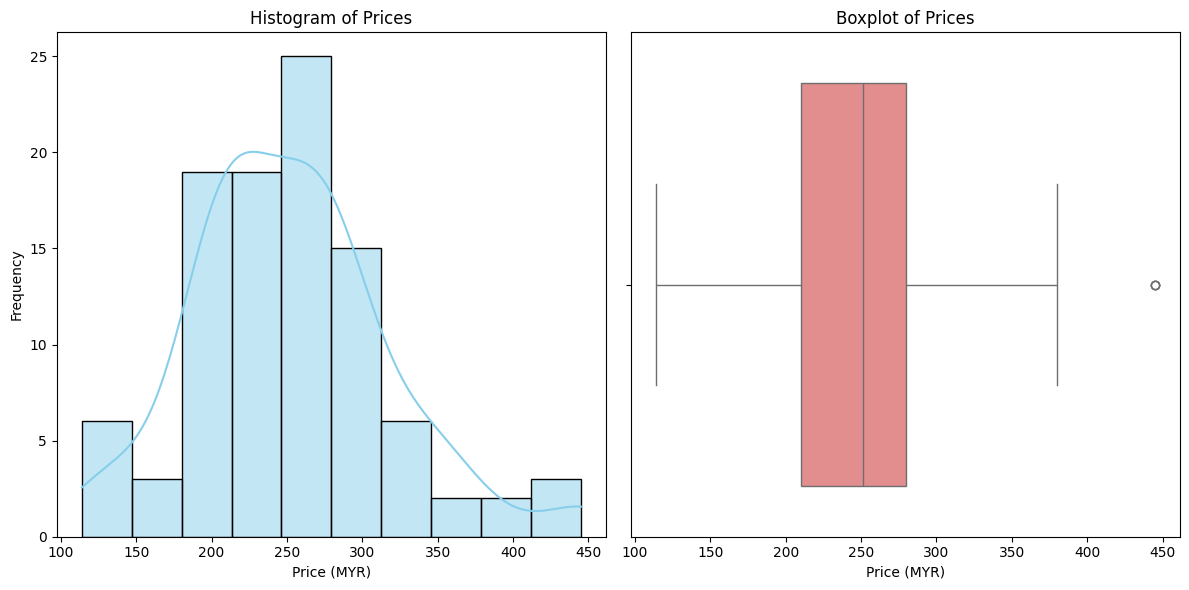

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(booking_com['Price'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Prices')
plt.xlabel('Price (MYR)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=booking_com['Price'], color='lightcoral')
plt.title('Boxplot of Prices')
plt.xlabel('Price (MYR)')

plt.tight_layout()
plt.show()

In [ ]:
#minimum and maximum value of a dataset. min/max values are helpful to understand the range of values in a variable.
print("Minimum value: ",booking_com["Price"].min())
print("Maximum value: ", booking_com["Price"].max())

Minimum value:  114.0
Maximum value:  445.0


Outliers

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'booking_com'
Q1 = booking_com['Price'].quantile(0.25)
Q3 = booking_com['Price'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = booking_com[(booking_com['Price'] < lower_bound) | (booking_com['Price'] > upper_bound)]

# Print the outliers
print(outliers)

                          name                             Location  Price  \
14  EATON RESIDENCE KLCC BY JD  Downtown Kuala Lumpur, Kuala Lumpur  445.0   
29  EATON RESIDENCE KLCC BY JD  Downtown Kuala Lumpur, Kuala Lumpur  445.0   
54  EATON RESIDENCE KLCC BY JD  Downtown Kuala Lumpur, Kuala Lumpur  445.0   

         Recommended Room No. of reviews       Rating Score  \
14  One-Bedroom Apartment     32 reviews  Exceptional   9.7   
29  One-Bedroom Apartment     32 reviews  Exceptional   9.7   
54  One-Bedroom Apartment     32 reviews  Exceptional   9.7   

                                              Details  \
14  Entire apartment•1 bedroom•1 living room•1 bat...   
29  Entire apartment•1 bedroom•1 living room•1 bat...   
54  Entire apartment•1 bedroom•1 living room•1 bat...   

      Travel Sustainable Level  
14  Travel Sustainable Level 3  
29  Travel Sustainable Level 3  
54  Travel Sustainable Level 3  


**b. Use both of attributes to create scatterplot**

To create scatterplot we need to use numerical data. Therefore,attributes that chosen are score and price which are numerical and then create a scatterplot:

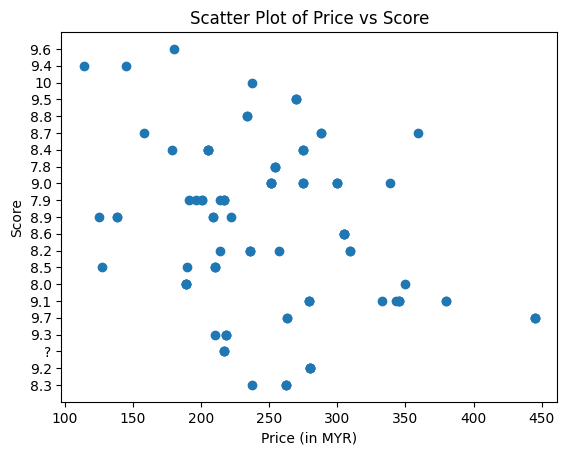

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'booking_com'
# Scatter plot
plt.scatter(booking_com['Price'], booking_com['Score'])

# Add labels and title
plt.title('Scatter Plot of Price vs Score')
plt.xlabel('Price (in MYR)')
plt.ylabel('Score')

# Show the plot
plt.show()


Outliers

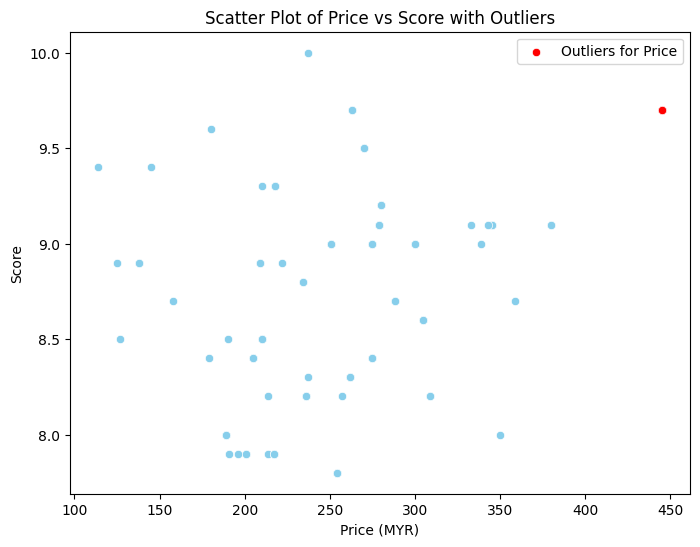

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named 'booking_com'
plt.figure(figsize=(8, 6))

# Convert 'Score' column to numeric
booking_com['Score'] = pd.to_numeric(booking_com['Score'], errors='coerce')

# Scatter plot
sns.scatterplot(x='Price', y='Score', data=booking_com, color='skyblue')

# Identify outliers using IQR method
Q1_price = booking_com['Price'].quantile(0.25)
Q3_price = booking_com['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

Q1_score = booking_com['Score'].quantile(0.25)
Q3_score = booking_com['Score'].quantile(0.75)
IQR_score = Q3_score - Q1_score
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

outliers_price = booking_com[(booking_com['Price'] < lower_bound_price) | (booking_com['Price'] > upper_bound_price)]
outliers_score = booking_com[(booking_com['Score'] < lower_bound_score) | (booking_com['Score'] > upper_bound_score)]

# Highlight outliers on the scatter plot
sns.scatterplot(x='Price', y='Score', data=outliers_price, color='red', label='Outliers for Price')
sns.scatterplot(x='Price', y='Score', data=outliers_score, color='orange', label='Outliers for Score')

# Add labels and title
plt.title('Scatter Plot of Price vs Score with Outliers')
plt.xlabel('Price (MYR)')
plt.ylabel('Score')

plt.legend()
plt.show()


### After Data Cleaning

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

booking_com2 = pd.read_csv('Booking.com_cleaned.csv')

In [ ]:
# Convert 'price' column to string and remove 'MYR'
booking_com2['Price'] = booking_com2['Price'].apply(lambda x: x.replace('MYR', ''))

# Convert 'price' column to float for plotting
booking_com2['Price'] = booking_com2['Price'].astype(float)

booking_com2['Price']

0     345.0
1     345.0
2     345.0
3     114.0
4     205.0
      ...  
95    263.0
96    263.0
97    309.0
98    309.0
99    350.0
Name: Price, Length: 100, dtype: float64

**a. Choose one of the attributes to create histogram and boxplot.**
<br>
Attribute that chosen is price to create histogram and boxplot

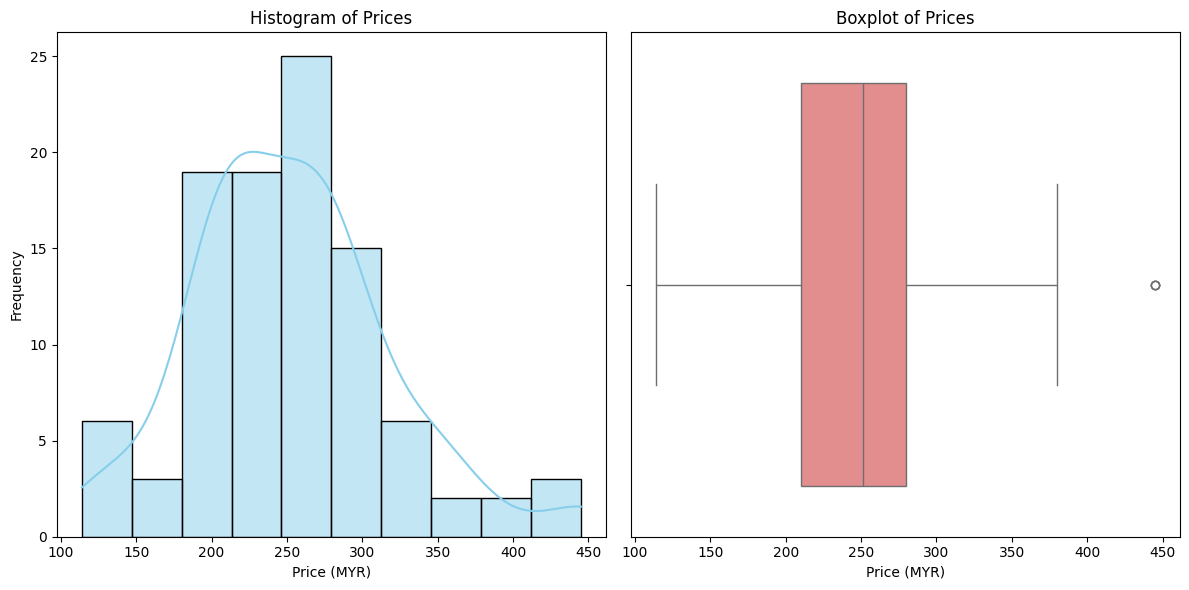

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(booking_com2['Price'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Prices')
plt.xlabel('Price (MYR)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=booking_com2['Price'], color='lightcoral')
plt.title('Boxplot of Prices')
plt.xlabel('Price (MYR)')

plt.tight_layout()
plt.show()

In [ ]:
#minimum and maximum value of a dataset. min/max values are helpful to understand the range of values in a variable.
print("Minimum value: ",booking_com2["Price"].min())
print("Maximum value: ", booking_com2["Price"].max())

Minimum value:  114.0
Maximum value:  445.0


In [ ]:
#Find outliers
import pandas as pd

# Assuming your DataFrame is named 'booking_com'
Q1 = booking_com2['Price'].quantile(0.25)
Q3 = booking_com2['Price'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = booking_com2[(booking_com2['Price'] < lower_bound) | (booking_com2['Price'] > upper_bound)]

# Print the outliers
print(outliers)

                          name                             Location  Price  \
23  EATON RESIDENCE KLCC BY JD  Downtown Kuala Lumpur, Kuala Lumpur  445.0   
24  EATON RESIDENCE KLCC BY JD  Downtown Kuala Lumpur, Kuala Lumpur  445.0   
25  EATON RESIDENCE KLCC BY JD  Downtown Kuala Lumpur, Kuala Lumpur  445.0   

         Recommended Room  No. of reviews       Rating  Score  \
23  One-Bedroom Apartment              32  Exceptional    9.7   
24  One-Bedroom Apartment              32  Exceptional    9.7   
25  One-Bedroom Apartment              32  Exceptional    9.7   

                                              Details  \
23  Entire apartment•1 bedroom•1 living room•1 bat...   
24  Entire apartment•1 bedroom•1 living room•1 bat...   
25  Entire apartment•1 bedroom•1 living room•1 bat...   

      Travel Sustainable Level  
23  Travel Sustainable Level 3  
24  Travel Sustainable Level 3  
25  Travel Sustainable Level 3  


**b. Use both of attributes to create scatterplot**

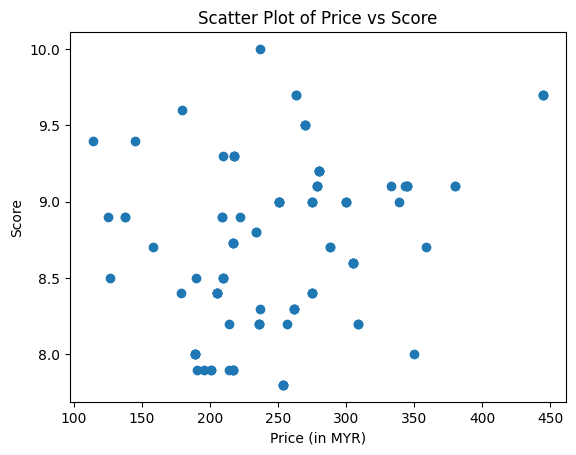

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'booking_com'
# Scatter plot
plt.scatter(booking_com2['Price'], booking_com2['Score'])

# Add labels and title
plt.title('Scatter Plot of Price vs Score')
plt.xlabel('Price (in MYR)')
plt.ylabel('Score')

# Show the plot
plt.show()

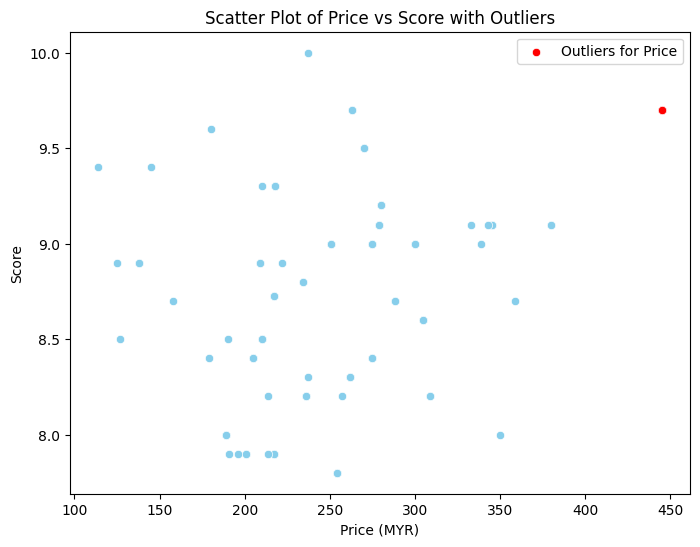

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named 'booking_com'
plt.figure(figsize=(8, 6))

# Convert 'Score' column to numeric
booking_com2['Score'] = pd.to_numeric(booking_com2['Score'], errors='coerce')

# Scatter plot
sns.scatterplot(x='Price', y='Score', data=booking_com2, color='skyblue')

# Identify outliers using IQR method
Q1_price = booking_com2['Price'].quantile(0.25)
Q3_price = booking_com2['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

Q1_score = booking_com2['Score'].quantile(0.25)
Q3_score = booking_com2['Score'].quantile(0.75)
IQR_score = Q3_score - Q1_score
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

outliers_price = booking_com2[(booking_com2['Price'] < lower_bound_price) | (booking_com2['Price'] > upper_bound_price)]
outliers_score = booking_com2[(booking_com2['Score'] < lower_bound_score) | (booking_com2['Score'] > upper_bound_score)]

# Highlight outliers on the scatter plot
sns.scatterplot(x='Price', y='Score', data=outliers_price, color='red', label='Outliers for Price')
sns.scatterplot(x='Price', y='Score', data=outliers_score, color='orange', label='Outliers for Score')

# Add labels and title
plt.title('Scatter Plot of Price vs Score with Outliers')
plt.xlabel('Price (MYR)')
plt.ylabel('Score')

plt.legend()
plt.show()